# Data wrangling for Capstone Project 1

For the data wrangling part of the capstone project I have not included all of the variables included in the data set, rather I have only included those which are of interest for this section. They are:
    - Y, which is our outcome variable
    - Age
    - Job
    - Education level
    - Account balance
    - Contact method
    - Poutcome

In [24]:
#We start off by importing the necessary libaries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# We then import the data as a Pandas dataframe
bank = pd.read_csv('bank-full2.csv', delimiter=',')

## Outcome variable

We then want to look at our outcome variable, by looking at the proportion of sucesses we can see two things. Firstly we can get an idea of how unbalanced out data set is. Secondly it gives us a base line of comparison so that we can compare the overall success to the success of a particular subset of our data

In [27]:
# we'll start off by counting the total number of people who did and didn't subscribe
ycount = bank['y'].value_counts()
# we need to count the number of total observations
rowcount = bank.shape[0]-1

print('Proportion yes: ' + '{0:2.3f}'.format((ycount[1]/rowcount)))
print('Proportion no: ' + '{0:2.3f}'.format((ycount[0]/rowcount)))

# We'll save the overall proportion of successes as the variable expected, this will help us with our chi squared tests
expected = ycount[1]/rowcount

Proportion yes: 0.117
Proportion no: 0.883


## Age

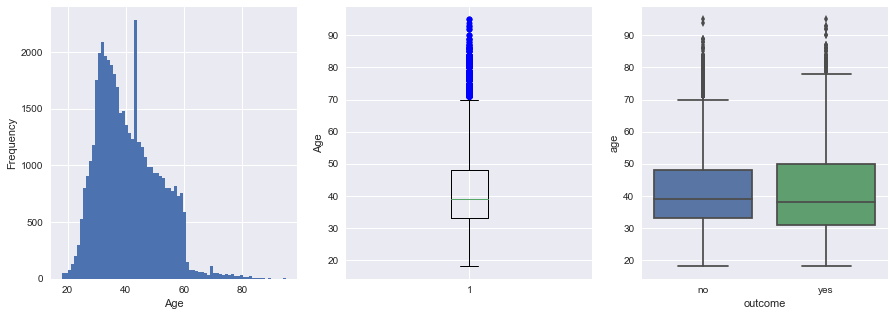

In [7]:
plt.subplot(1, 3, 1)
ageplt = bank.age.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Age')

plt.subplot(1, 3, 2)
agebox = plt.boxplot(bank.age, 0, 'b')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
agebox2 = sns.boxplot(x="y", y="age", data=bank)
agebox2.set(xlabel='outcome')

Looking at the age variable we can see that there are some outliers, however the oldest person in our data set appears to be about 95 years old. Considering we have approximately 45200 people in our data set, it seems entirely reasonable that we have a few elderly customers in our data set. 

Thus since there doesn't appear to be any obvious errors with this variable, it would be best to leave the variables as they are.

## Job

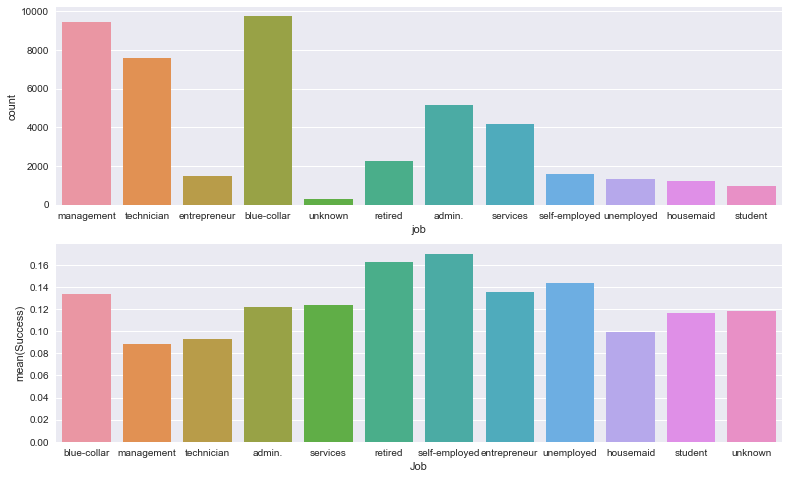

In [23]:
# We first graph the job titles and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="job", data=bank)

# We then want to graph the which shows how successful the campaign was with each job category, to do this we first need to build a data frame which shows the proportion of success, grouped by job
jobsuccess = bank['job'].loc[bank['y']== 'yes'].value_counts()
jobcount = bank['job'].value_counts()
X = pd.DataFrame(columns=['Job','Success'])

Job=[]
Success=[]
for item in range(len(jobcount)):
    Job.append(jobcount.keys()[item])
    Success.append(jobsuccess[item]/jobcount[item])

Proportion = {'Job':Job, 'Success':Success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='Job', y='Success', data=X)

Looking at the job titles we can see that there is a small number of customers with missing job titles. Looking at the mean success of this variable, it looks as though there is no difference between the success rate of the overall data set, and the success rate where the job title is unknown. It is for these two reasons that I feel that it is best to simply drop the rows where the job title is unknown.

In [19]:
# We drop the 288 rows where the job is unknown
bank = bank.drop(bank[bank.job=='unknown'].index)

## Education level

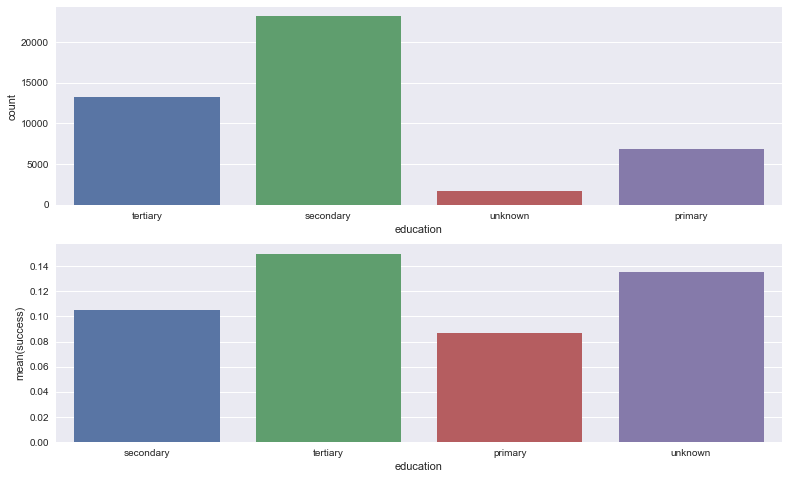

In [9]:
# We first graph the education level and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="education", data=bank)

# We then want to graph the which shows how successful the campaign was with each education level, to do this we first need to build a data frame which shows the proportion of success, grouped education level
educationsuccess = bank['education'].loc[bank['y']== 'yes'].value_counts()
educationcount = bank['education'].value_counts()
X = pd.DataFrame(columns=['education','Success'])

education=[]
success=[]
for item in range(len(educationcount)):
    education.append(educationcount.keys()[item])
    success.append(educationsuccess[item]/educationcount[item])

Proportion = {'education':education, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='education', y='success', data=X)

We can see that although there is a small number of rows where the education level is unknown, there is a significant difference between the overall average success rate, and the success rate where the customers education level was unknown. Thus we can see that there is some information contained in this unknown category, and thus it would be useful to treat it as a fourth category.

## Account balance

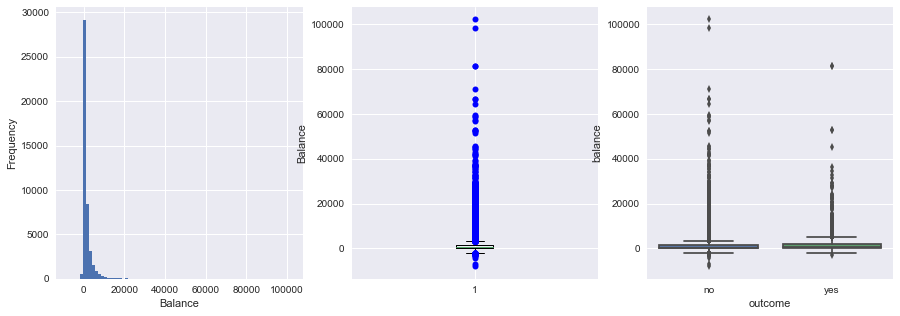

In [32]:
plt.subplot(1, 3, 1)
ageplt = bank.balance.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Balance')

plt.subplot(1, 3, 2)
agebox = plt.boxplot(bank.balance, 0, 'b')
plt.ylabel('Balance')

plt.subplot(1, 3, 3)
agebox2 = sns.boxplot(x="y", y="balance", data=bank)
agebox2.set(xlabel='outcome')

From the histogram we can see that there is a large variance in the account balances, with some balances having a negative average balance and thus it may be helpful to explore the positive and negative balances separately.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


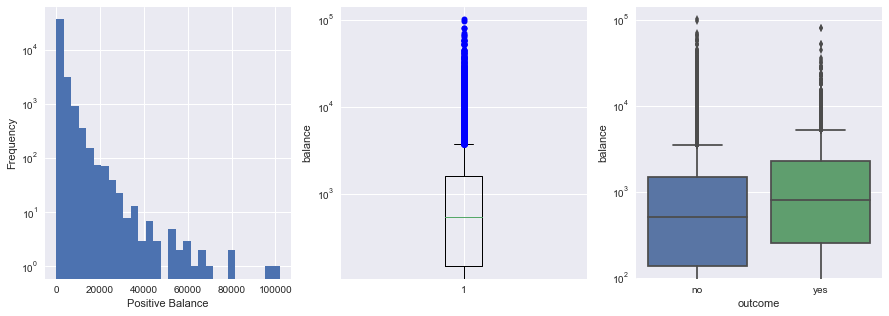

In [10]:
# Balance - average yearly balance, in euros, we will split the data into accounts with positive and negative balances
nbalance = bank.loc[bank['balance']<0]
nbalance['balance'] = nbalance['balance'].apply(lambda x: x*-1)
pbalance = bank.loc[bank['balance']>=0]

# We will now look at the positive balances
plt.subplot(1, 3, 1)
balanceplt = pbalance.balance.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Positive Balance')
balanceplt.set_yscale('log')

plt.subplot(1, 3, 2)
balancebox = plt.boxplot(pbalance.balance, 0, 'b')
plt.ylabel('balance')
plt.yscale('log')

plt.subplot(1, 3, 3)
balancebox2 = sns.boxplot(x="y", y="balance", data=pbalance)
balancebox2.set(xlabel='outcome')
plt.yscale('log')

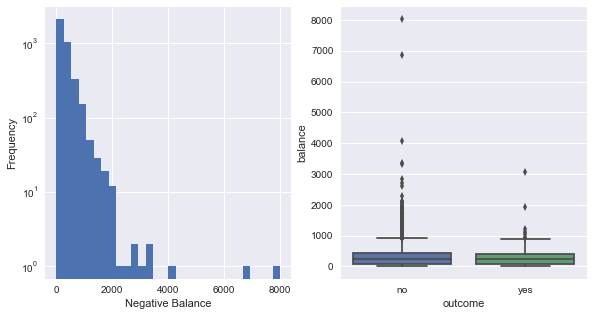

In [28]:
plt.subplot(1, 3, 1)
balanceplt = nbalance.balance.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Negative Balance')
balanceplt.set_yscale('log')

plt.subplot(1, 3, 2)
#balancebox = plt.boxplot(nbalance.balance, 0, 'b')

plt.subplot(1, 3, 2)
balancebox2 = sns.boxplot(x="y", y="balance", data=nbalance)
balancebox2.set(xlabel='outcome')

It seems that the positive and negative balances behave differently, there appears to be a difference in the distribution of  balances of the customers who said yes and had a positive account balance versus those who had a positive balance but said no. Yet when we look at the negative balances, the distribution of the account balances looks roughly similar.

It may be perhaps useful to do two things, firstly we can transform all account balances using log scaling, secondly we can create two separate categories, one which shows positive balances, and the other which shows negative balances. This work will be done in the feature engineering section of the project. We will see in the modeling section of the project if these new features have any effect on the accuracy of the model.

## Contact

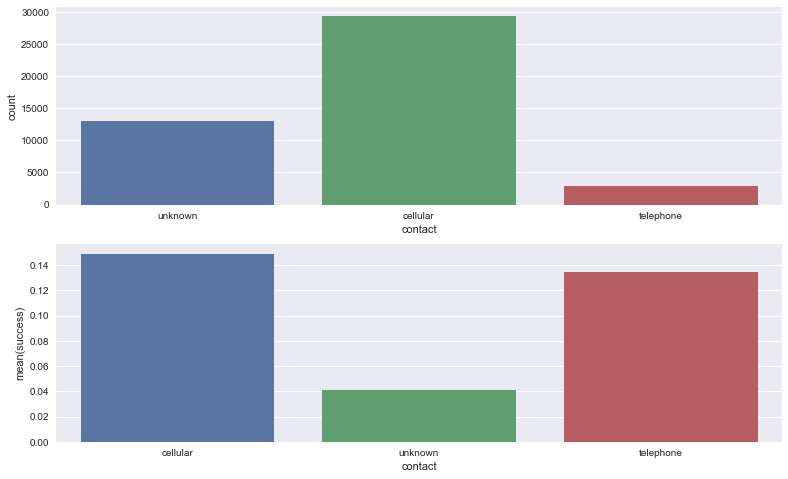

In [30]:
# Contact - contact communication method
# We first graph the contact method and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="contact", data=bank)

# We then want to graph the which shows how successful the campaign was with each contact method, to do this we first need to build a data frame which shows the proportion of success, grouped by contact method
contactsuccess = bank['contact'].loc[bank['y']== 'yes'].value_counts()
contactcount = bank['contact'].value_counts()
X = pd.DataFrame(columns=['contact','Success'])

contact=[]
success=[]
for item in range(len(contactcount)):
    contact.append(contactcount.keys()[item])
    success.append(contactsuccess[item]/contactcount[item])

Proportion = {'contact':contact, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='contact', y='success', data=X)

From the above chart we can see that the unknown contact method accounts for about one third of the entries, however the success rate where the unknown contact method is recorded is much lower than the overall average. There clearly something going on here, however without more information it is difficult to know when the contact method was not recorded. 

I feel that the best way to deal with this abnormality is to treat is as a legitimate third category for the contact variable.

## Poutcome

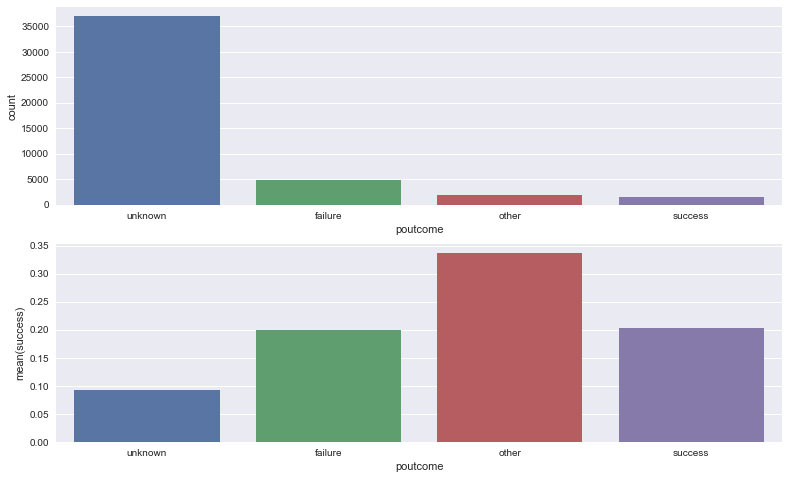

In [29]:
# Poutcome - Outcome of the previous marketing campaign
# We first graph the previous outcomes and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="poutcome", data=bank)

# We then want to graph the which shows how successful the campaign was with previous outcome category, to do this we first need to build a data frame which shows the proportion of success, grouped by previous outcome
poutcomesuccess = bank['poutcome'].loc[bank['y']== 'yes'].value_counts()
poutcomecount = bank['poutcome'].value_counts()
X = pd.DataFrame(columns=['poutcome','Success'])

poutcome=[]
success=[]
for item in range(len(poutcomecount)):
    poutcome.append(poutcomecount.keys()[item])
    success.append(poutcomesuccess[item]/poutcomecount[item])

Proportion = {'poutcome':poutcome, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='poutcome', y='success', data=X)

The poutcome variable looks quite similar to the contact method variable in the sense that, the occurrence of the unknown category is so prevalent, and the mean success rate is far from the overall mean. However in this case the unknown variable accounts for approximately 87% of our rows. The reason for this is because these represent customers who were never contacted in the previous campaign, thus the outcome was recorded as unknown.

From this we can see that the unknown category is a legitimate category, and should be left untouched.

## Label encoding

To finalise the data wrangling process we'll encode the variables using a label encoder, this will make it easier to train our models on the data.

In [33]:
lb_make = LabelEncoder()

categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
for col in categories: 
    bank[str(col)+"_code"] = lb_make.fit_transform(bank[col]) 